In [1]:
import numpy as np

# Needed for reproducible results
np.random.seed(1)

from keras.models import Sequential
from keras.layers import LSTM, Dense

# Generate example data
# -----------------------------------------------------------------------------
x_train = y_train = [np.sin(i) for i in np.arange(start=0, stop=10, step=0.01)]
noise = np.random.normal(loc=0, scale=0.1, size=len(x_train))
x_train += noise

n_examples = len(x_train)
n_features = 1
n_outputs = 1
time_steps = 1

x_train = np.reshape(x_train, (n_examples, time_steps, n_features))
y_train = np.reshape(y_train, (n_examples, n_outputs))

# Initialize LSTM
# -----------------------------------------------------------------------------
batch_size = 100
model = Sequential()
model.add(LSTM(units=10, input_shape=(time_steps, n_features),
               return_sequences=True, stateful=True, batch_size=batch_size))
model.add(LSTM(units=10, return_sequences=False, stateful=True))
model.add(Dense(units=n_outputs, activation='linear'))
model.compile(loss='mse', optimizer='adadelta')

# Train LSTM
# -----------------------------------------------------------------------------
epochs = 70

# !!! To get exactly the same results between the cases, do the following:
# !!!  * To record the loss of the 1st case, run all the code until here.
# !!!  * To record the loss of the 2nd case,
# !!!    restart Python, comment out the 1st case and run all the code.

Using TensorFlow backend.


In [20]:
# Case 1
for i in range(epochs):
    model.fit(x_train, y_train, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    # model.reset_states()

Epoch 1/1
 - 0s - loss: 0.0109
Epoch 1/1
 - 0s - loss: 0.0109
Epoch 1/1
 - 0s - loss: 0.0109
Epoch 1/1
 - 0s - loss: 0.0109
Epoch 1/1
 - 0s - loss: 0.0109
Epoch 1/1
 - 0s - loss: 0.0108
Epoch 1/1
 - 0s - loss: 0.0108
Epoch 1/1
 - 0s - loss: 0.0108
Epoch 1/1
 - 0s - loss: 0.0108
Epoch 1/1
 - 0s - loss: 0.0108
Epoch 1/1
 - 0s - loss: 0.0108
Epoch 1/1
 - 0s - loss: 0.0108
Epoch 1/1
 - 0s - loss: 0.0108
Epoch 1/1
 - 0s - loss: 0.0108
Epoch 1/1
 - 0s - loss: 0.0108
Epoch 1/1
 - 0s - loss: 0.0108
Epoch 1/1
 - 0s - loss: 0.0108
Epoch 1/1
 - 0s - loss: 0.0107
Epoch 1/1
 - 0s - loss: 0.0107
Epoch 1/1
 - 0s - loss: 0.0107
Epoch 1/1
 - 0s - loss: 0.0107
Epoch 1/1
 - 0s - loss: 0.0107
Epoch 1/1
 - 0s - loss: 0.0107
Epoch 1/1
 - 0s - loss: 0.0107
Epoch 1/1
 - 0s - loss: 0.0107
Epoch 1/1
 - 0s - loss: 0.0107
Epoch 1/1
 - 0s - loss: 0.0107
Epoch 1/1
 - 0s - loss: 0.0107
Epoch 1/1
 - 0s - loss: 0.0107
Epoch 1/1
 - 0s - loss: 0.0106
Epoch 1/1
 - 0s - loss: 0.0106
Epoch 1/1
 - 0s - loss: 0.0106
Epoch 1/

In [21]:
# Case 2
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2, shuffle=False)

Epoch 1/70
 - 0s - loss: 0.0103
Epoch 2/70
 - 0s - loss: 0.0103
Epoch 3/70
 - 0s - loss: 0.0103
Epoch 4/70
 - 0s - loss: 0.0103
Epoch 5/70
 - 0s - loss: 0.0103
Epoch 6/70
 - 0s - loss: 0.0103
Epoch 7/70
 - 0s - loss: 0.0102
Epoch 8/70
 - 0s - loss: 0.0102
Epoch 9/70
 - 0s - loss: 0.0102
Epoch 10/70
 - 0s - loss: 0.0102
Epoch 11/70
 - 0s - loss: 0.0102
Epoch 12/70
 - 0s - loss: 0.0102
Epoch 13/70
 - 0s - loss: 0.0102
Epoch 14/70
 - 0s - loss: 0.0102
Epoch 15/70
 - 0s - loss: 0.0102
Epoch 16/70
 - 0s - loss: 0.0102
Epoch 17/70
 - 0s - loss: 0.0102
Epoch 18/70
 - 0s - loss: 0.0102
Epoch 19/70
 - 0s - loss: 0.0101
Epoch 20/70
 - 0s - loss: 0.0101
Epoch 21/70
 - 0s - loss: 0.0101
Epoch 22/70
 - 0s - loss: 0.0101
Epoch 23/70
 - 0s - loss: 0.0101
Epoch 24/70
 - 0s - loss: 0.0101
Epoch 25/70
 - 0s - loss: 0.0101
Epoch 26/70
 - 0s - loss: 0.0101
Epoch 27/70
 - 0s - loss: 0.0101
Epoch 28/70
 - 0s - loss: 0.0101
Epoch 29/70
 - 0s - loss: 0.0101
Epoch 30/70
 - 0s - loss: 0.0101
Epoch 31/70
 - 0s -

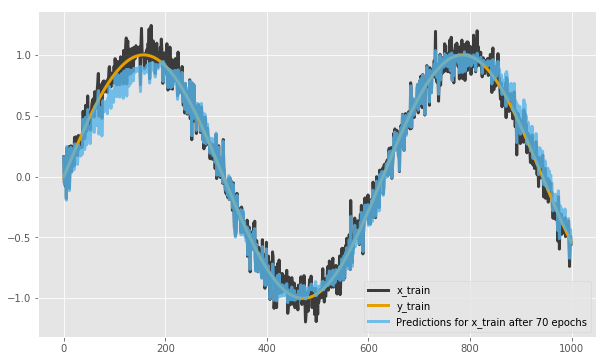

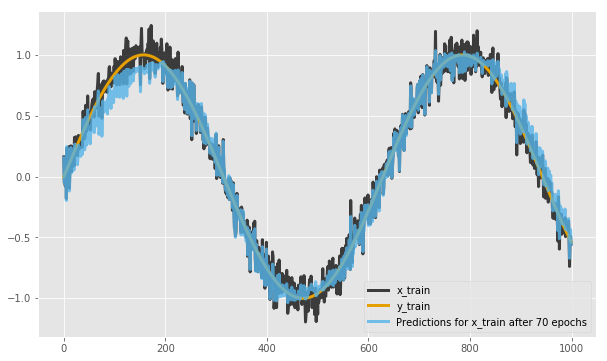

In [23]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
ax = plt.figure(figsize=(10, 6)).add_subplot(111)
ax.plot(x_train[:, 0], label='x_train', color='#111111', alpha=0.8, lw=3)
ax.plot(y_train[:, 0], label='y_train', color='#E69F00', alpha=1, lw=3)
ax.plot(model.predict(x_train, batch_size=batch_size)[:, 0],
        label='Predictions for x_train after %i epochs' % epochs,
        color='#56B4E9', alpha=0.8, lw=3)
plt.legend(loc='lower right')
plt.show()